[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/carlos-adir/UnB-Courses/blob/main/vibracoes/estimate-harmonic-force.ipynb)

In [1]:
import numpy as np
import sympy as sp
from typing import Iterable, Tuple
from scipy.integrate import odeint
try:
    from matplolib import pyplot as plt
except ModuleNotFoundError:
    import os
    os.system("pip install matplotlib")
    from matplotlib import pyplot as plt
from matplotlib import cm

## The problem

In this problem we have a spring-mass-damper system with constants $k$, $m$ and $c$ respectively.
The ODE (ordinary differential equation)

$$
m\ddot{x} + c\dot{x} + kx = f
$$

Where are going to consider that $f$ is harmonic, that means

$$
f(t) = f_0 \cdot \cos \omega t = f_0 \exp \left(i\omega t\right)
$$

In [2]:
k = 10
c = 4
m = 20
f0 = 10
wn = np.sqrt(k/m)
xi = c/(2*np.sqrt(k*m))
rres = np.sqrt(1-2*xi**2)
wres = wn*rres
print("     k = %.2f" % k)
print("     c = %.2f" % c)
print("     m = %.2f" % m)
print("    f0 = %.2f" % f0)
print("    wn = %.2f" % wn)
print("    x0 = %.2f" % xi)
print("    rr = %.2f" % rres)
print("    wr = %.2f" % wres)

     k = 10.00
     c = 4.00
     m = 20.00
    f0 = 10.00
    wn = 0.71
    x0 = 0.14
    rr = 0.98
    wr = 0.69


In [3]:
rplot = np.linspace(0.05, 5, 1025)
xis = [0.1, 0.3, 0.6, 0.8, 1, 1.2]

## The function $G(\omega)$

For this problem, we don't care about the transient period, only when the intransient.
That means that $x(t)$ assumes the expression

$$
x(t) = X(\omega) \cdot \exp \left(i\omega t\right)
$$

Applying on the ODE we get

$$
\dot{x} = i\omega X(\omega) \cdot \exp \left(i\omega t\right)
$$
$$
\ddot{x} = -\omega^2 X(\omega) \cdot \exp \left(i\omega t\right)
$$

Then we have

$$
\left[-m\omega^2+ic\omega+k\right] \cdot X(\omega) \cdot \exp \left(i\omega t\right) = f_0 \exp \left(i\omega t\right)
$$

$$
\boxed{X(\omega) = \dfrac{f_0}{k-m\omega^2 + ic\omega} = \dfrac{f_0}{k} \cdot G(\omega)}
$$

$$
G(\omega) = \dfrac{kx}{f} = \dfrac{1}{1-\left(\frac{\omega}{\omega_n}\right)^2 + 2i\xi \left(\frac{\omega}{\omega_n}\right)}
$$

When we plot the curves of $G(\omega)$, the gain $\left|G(\omega)\right|$ and the phase $\arg(G(\omega))$ then we get

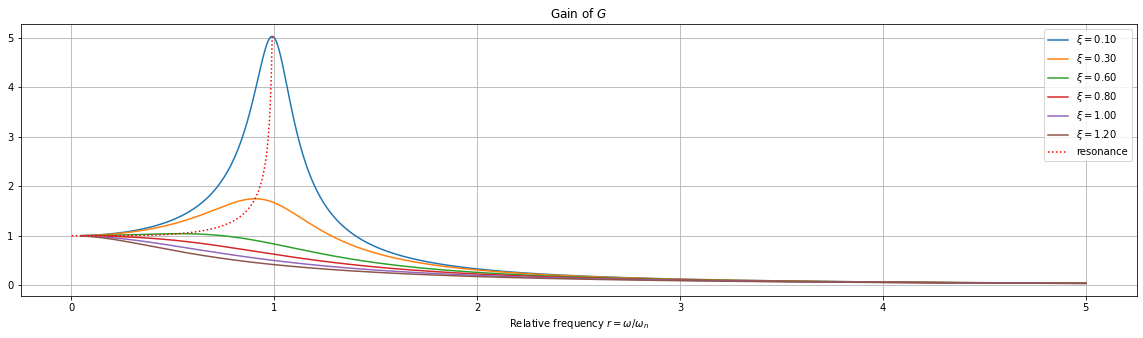

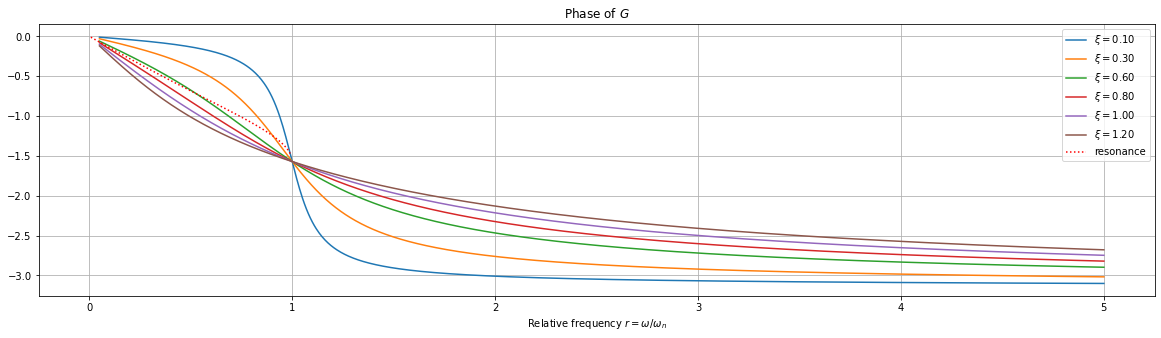

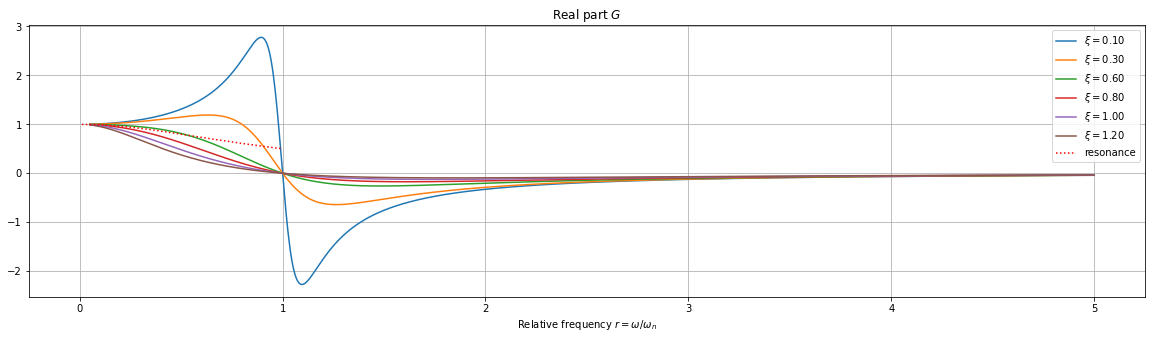

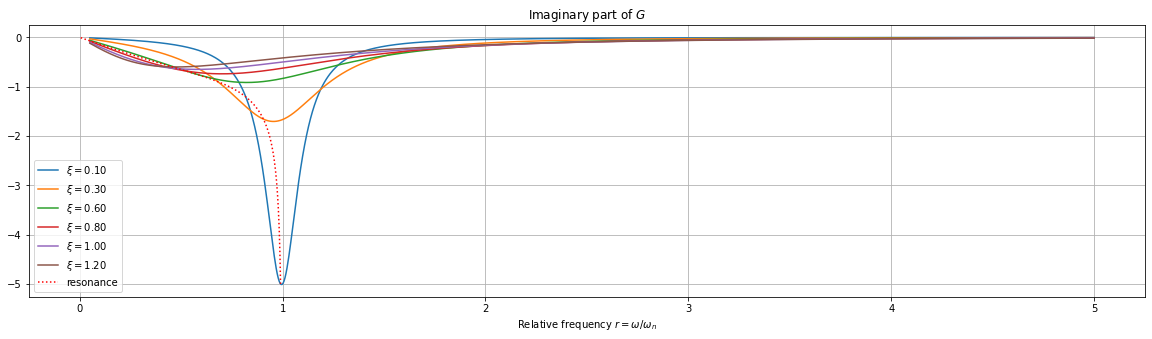

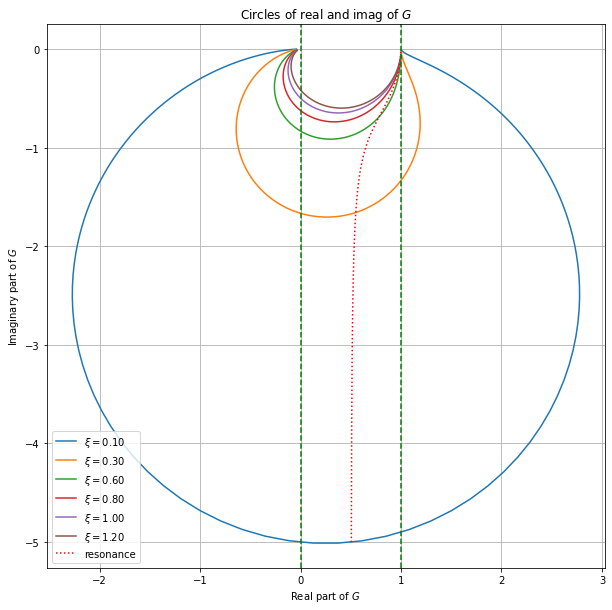

In [4]:
xiplot = np.linspace(0.1, 1/np.sqrt(2), 129)
rresonance = np.sqrt(1-2*xiplot**2)
Gresonance = 1/(1-rresonance**2 + 2j*xiplot*rresonance)
fig1 = plt.figure(figsize=(20, 5))
axes1 = plt.gca()
fig2 = plt.figure(figsize=(20, 5))
axes2 = plt.gca()
fig3 = plt.figure(figsize=(20, 5))
axes3 = plt.gca()
fig4 = plt.figure(figsize=(20, 5))
axes4 = plt.gca()
fig5 = plt.figure(figsize=(10, 10))
axes5 = plt.gca()
for xii in xis:
    Gplot = 1/(1-rplot**2 + 2j*xii*rplot)
    axes1.plot(rplot, np.abs(Gplot), label=r"$\xi = %.2f$" % xii)
    axes2.plot(rplot, np.angle(Gplot), label=r"$\xi = %.2f$" % xii)
    axes3.plot(rplot, np.real(Gplot), label=r"$\xi = %.2f$" % xii)
    axes4.plot(rplot, np.imag(Gplot), label=r"$\xi = %.2f$" % xii)
    axes5.plot(np.real(Gplot), np.imag(Gplot), label=r"$\xi = %.2f$" % xii)
axes1.plot(rresonance, np.abs(Gresonance), ls="dotted", color="r", label="resonance")
axes2.plot(rresonance, np.angle(Gresonance), ls="dotted", color="r", label="resonance")
axes3.plot(rresonance, np.real(Gresonance), ls="dotted", color="r", label="resonance")
axes4.plot(rresonance, np.imag(Gresonance), ls="dotted", color="r", label="resonance")
axes5.plot(np.real(Gresonance), np.imag(Gresonance), ls="dotted", color="r", label="resonance")
axes1.set_title(r"Gain of $G$")
axes2.set_title(r"Phase of $G$")
axes3.set_title(r"Real part $G$")
axes4.set_title(r"Imaginary part of $G$")
axes5.set_title(r"Circles of real and imag of $G$")
for axes in [axes1, axes2, axes3, axes4, axes5]:
    axes.set_xlabel("Relative frequency $r = \omega/\omega_{n}$")
    axes.legend()
    axes.grid()
axes5.set_xlabel("Real part of $G$")
axes5.set_ylabel("Imaginary part of $G$")
axes5.axvline(x=0, ls="dashed", color="g")
axes5.axvline(x=1, ls="dashed", color="g")

The resonance frequency and the maximum value of the gain is given by

$$
\max_{\omega \in \mathbb{R}^+} |G(\omega)| = |G(\omega_r)| = \dfrac{1}{2\xi \sqrt{1-\xi^2}}
$$

$$
\omega_{r} = \omega_{n} \cdot \sqrt{1-2\xi^2}
$$

## The function $H(\omega)$

As we are interested in the curves $f(t)$ and $\ddot{x}(t)$ then we define a new function $H(\omega)$ given by

$$
H(\omega) = \dfrac{m\ddot{x}}{f}
$$

As we have

$$
\ddot{x}(t) = -\omega^2 \cdot X(\omega) \cdot \exp \left(i\omega t\right)
$$

Then 

$$
H(\omega) = \dfrac{-\omega^2}{\omega_n^2} \cdot G(\omega) = \dfrac{-\left(\frac{\omega}{\omega_n}\right)^2}{1-\left(\frac{\omega}{\omega_n}\right)^2 + 2i\xi \cdot \left(\frac{\omega}{\omega_n}\right)}
$$


Plotting the values of $H(\omega)$ we get

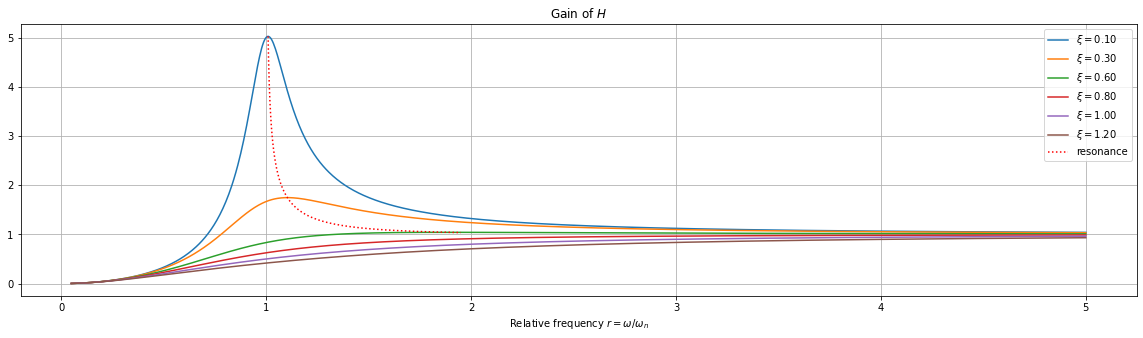

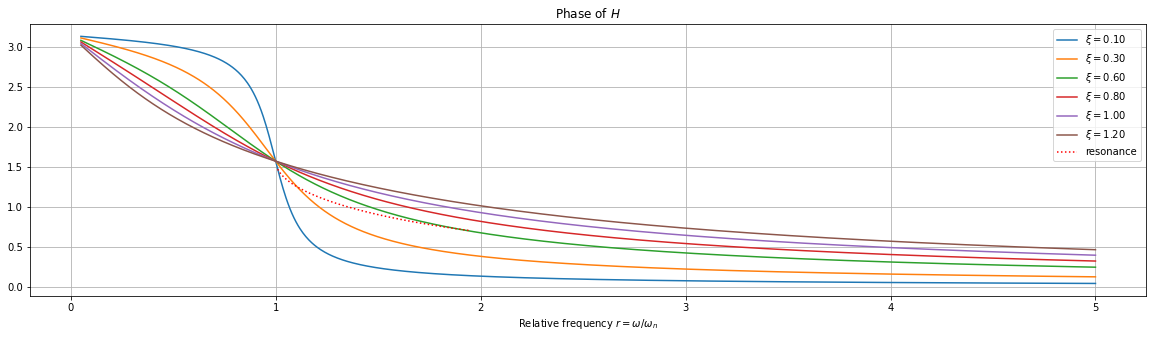

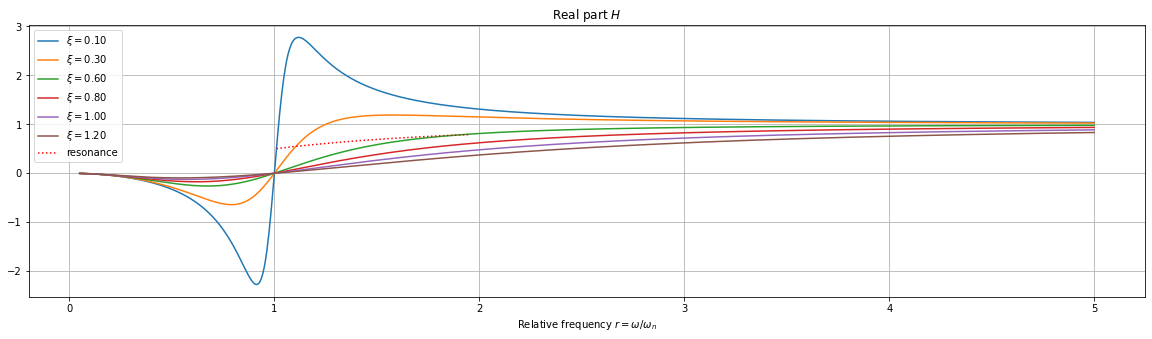

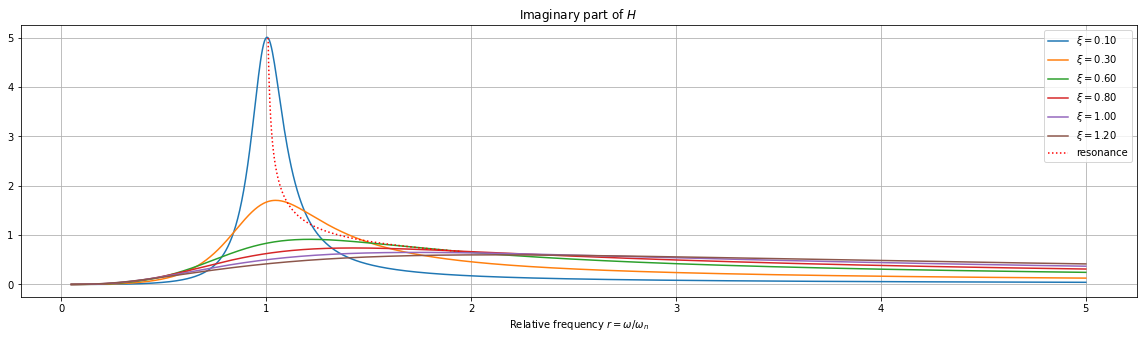

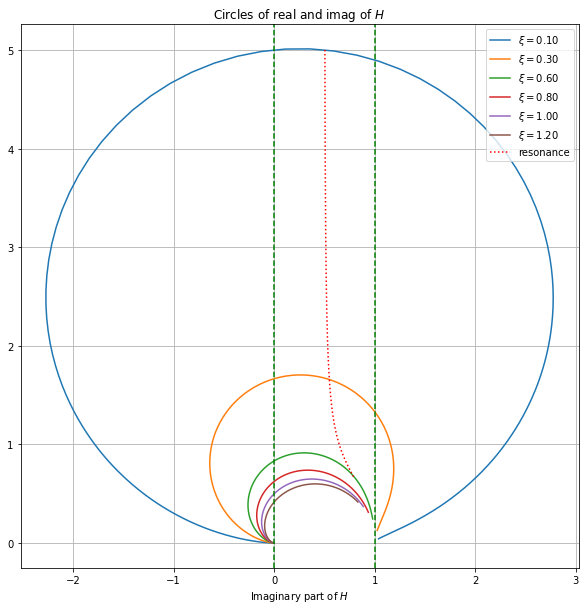

In [5]:
xiplot = np.linspace(0.1, 1/np.sqrt(2)-0.1, 129)
rresonance = 1/np.sqrt(1-2*xiplot**2)
Hresonance = -rresonance**2/(1-rresonance**2 + 2j*xiplot*rresonance)
fig1 = plt.figure(figsize=(20, 5))
axes1 = plt.gca()
fig2 = plt.figure(figsize=(20, 5))
axes2 = plt.gca()
fig3 = plt.figure(figsize=(20, 5))
axes3 = plt.gca()
fig4 = plt.figure(figsize=(20, 5))
axes4 = plt.gca()
fig5 = plt.figure(figsize=(10, 10))
axes5 = plt.gca()
for xii in xis:
    Hplot = -(rplot**2)/(1-rplot**2 + 2j*xii*rplot)
    axes1.plot(rplot, np.abs(Hplot), label=r"$\xi = %.2f$" % xii)
    axes2.plot(rplot, np.angle(Hplot), label=r"$\xi = %.2f$" % xii)
    axes3.plot(rplot, np.real(Hplot), label=r"$\xi = %.2f$" % xii)
    axes4.plot(rplot, np.imag(Hplot), label=r"$\xi = %.2f$" % xii)
    axes5.plot(np.real(Hplot), np.imag(Hplot), label=r"$\xi = %.2f$" % xii)
axes1.plot(rresonance, np.abs(Hresonance), ls="dotted", color="r", label="resonance")
axes2.plot(rresonance, np.angle(Hresonance), ls="dotted", color="r", label="resonance")
axes3.plot(rresonance, np.real(Hresonance), ls="dotted", color="r", label="resonance")
axes4.plot(rresonance, np.imag(Hresonance), ls="dotted", color="r", label="resonance")
axes5.plot(np.real(Hresonance), np.imag(Hresonance), ls="dotted", color="r", label="resonance")
axes1.set_title(r"Gain of $H$")
axes2.set_title(r"Phase of $H$")
axes3.set_title(r"Real part $H$")
axes4.set_title(r"Imaginary part of $H$")
axes5.set_title(r"Circles of real and imag of $H$")
for axes in [axes1, axes2, axes3, axes4, axes5]:
    axes.set_xlabel("Relative frequency $r = \omega/\omega_{n}$")
    axes.legend()
    axes.grid()
axes5.set_xlabel("Real part of $H$")
axes5.set_xlabel("Imaginary part of $H$")
axes5.axvline(x=0, ls="dashed", color="g")
axes5.axvline(x=1, ls="dashed", color="g")

## Plotting theoric graphs for given $\xi$ and $\omega$

In [6]:
xi = c/(2*np.sqrt(k*m))
rdots = np.array([0.2, 0.6, 0.8, 1.2, 1.5, 2.5, 5])
rdots.sort()
wdots = rdots * wn
rplot = np.linspace(min(rdots), max(rdots), 1025)
wplot = rplot * wn
Hplot = (-rplot**2)/(1-rplot**2 +2j*xi*rplot)
Hdots = (-rdots**2)/(1-rdots**2 +2j*xi*rdots)

mapping = np.log(rdots)
mapping -= np.min(mapping)
mapping /= np.max(mapping)
colors = cm.rainbow(mapping)

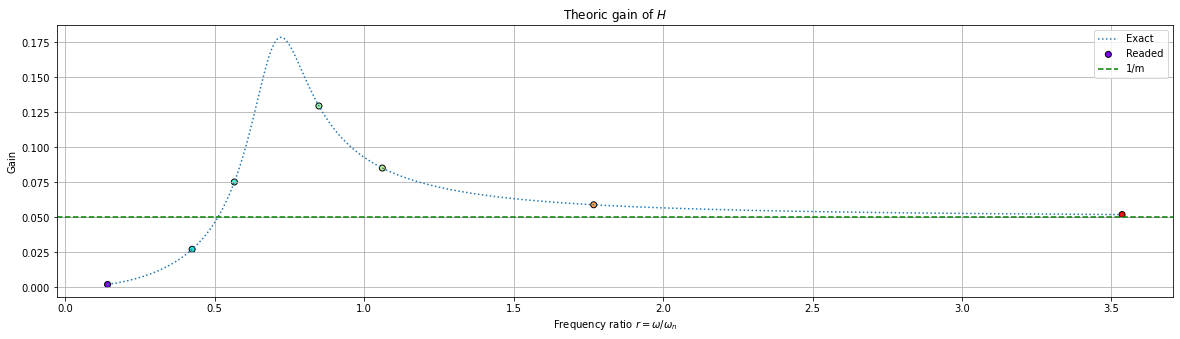

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(wplot, np.abs(Hplot)/m, ls="dotted", label="Exact")
plt.scatter(wdots, np.abs(Hdots)/m, marker="o", color=colors, label="Readed", edgecolors="black")
plt.axhline(y=1/m, ls="dashed", color="g", label="1/m")
plt.title(r"Theoric gain of $H$")
plt.ylabel(r"Gain")
plt.xlabel(r"Frequency ratio $r = \omega/\omega_n$")
plt.grid()
plt.legend()

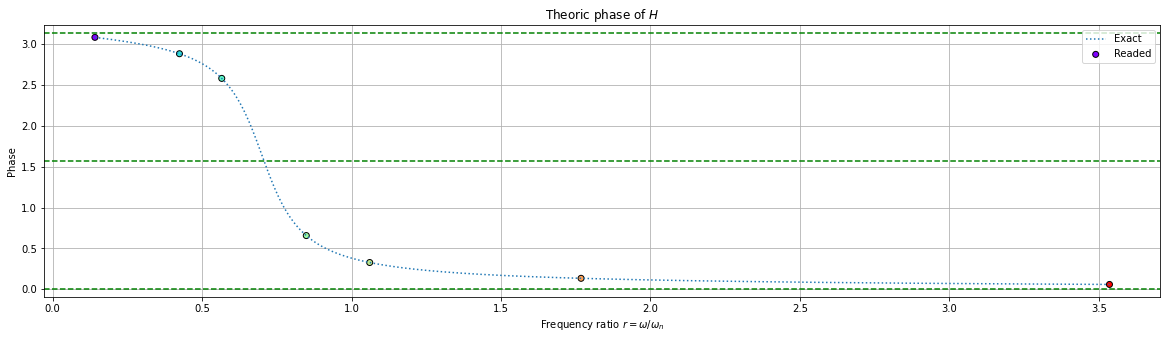

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(wplot, np.angle(Hplot), ls="dotted", label="Exact")
plt.scatter(wdots, np.angle(Hdots), marker="o", color=colors, label="Readed", edgecolors="black")
plt.title(r"Theoric phase of $H$")
plt.ylabel(r"Phase")
plt.xlabel(r"Frequency ratio $r = \omega/\omega_n$")
plt.axhline(y=0, ls="dashed", color="g")
plt.axhline(y=np.pi/2, ls="dashed", color="g")
plt.axhline(y=np.pi, ls="dashed", color="g")
plt.grid()
plt.legend()

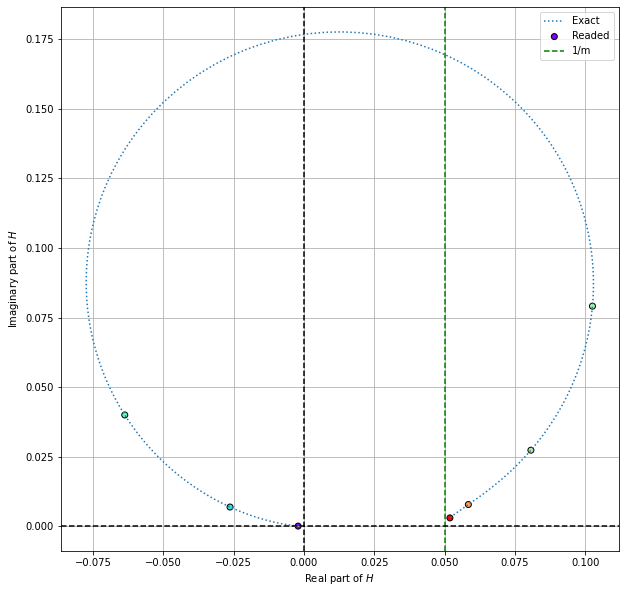

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(np.real(Hplot)/m, np.imag(Hplot)/m, ls="dotted", label="Exact")
plt.scatter(np.real(Hdots)/m, np.imag(Hdots)/m, marker="o", edgecolors="black", color=colors, label="Readed")
plt.ylabel(r"Imaginary part of $H$")
plt.xlabel(r"Real part of $H$")
plt.axvline(x=0, ls="dashed", color="k")
plt.axvline(x=1/m, ls="dashed", color="g", label="1/m")
plt.axhline(y=0, ls="dashed", color="k")
plt.grid()
plt.legend()

## Estimate parameters using artificial noisy data

To solve the problem, we have to create artificial data.

To do it, for a given frequency $\omega$ we are going to get the values of the acceleration $\ddot{x}$ and the force $f$ for each time $t$ given us a set of points

$$
(t_i, \ \ddot{x}_i, \ f_i)
$$

In [10]:
t = np.linspace(0, 60, 1025)
Hdots = -rdots**2/(1-rdots**2+2j*xi*rdots)
curves = {}
for r, w, H in zip(rdots, wdots, Hdots):
    noise = 2*np.random.rand(len(t))-1
    f = np.real( f0*np.exp(1j*w*t) )
    ddx = np.real( f0*H*np.exp(1j*w*t)/m )
    f += 0.04*f0*noise
    ddx += 0.04*(f0/m)*noise
    curves[r] = (t, ddx, f)

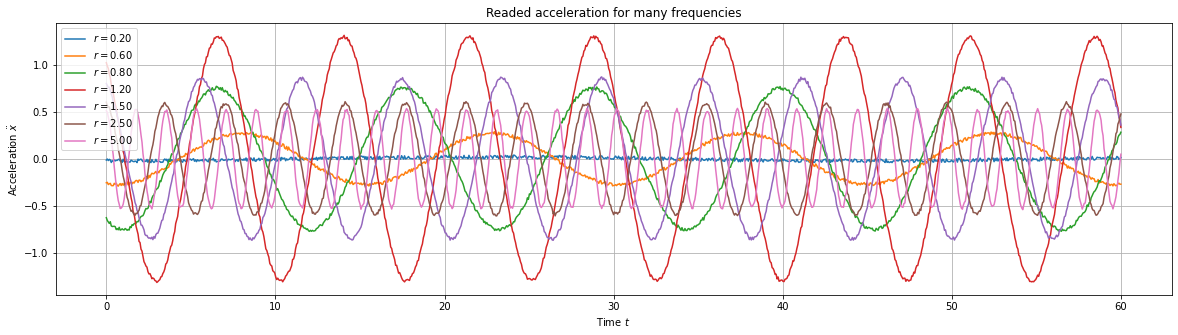

In [11]:
plt.figure(figsize=(20, 5))
for r in rdots:
    t, ddx, f = curves[r]
    plt.plot(t, ddx, label=r"$r=%.2f$"%r)
plt.title(r"Readed acceleration for many frequencies")
plt.ylabel(r"Acceleration $\ddot{x}$")
plt.xlabel(r"Time $t$")
plt.grid()
plt.legend()

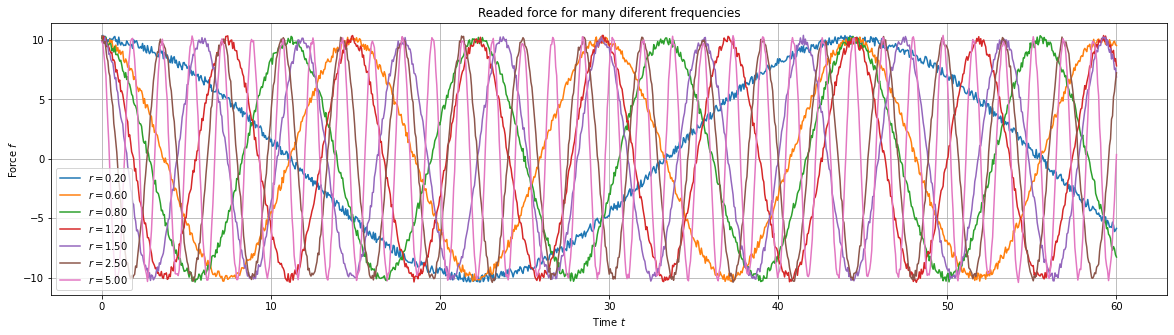

In [12]:
plt.figure(figsize=(20, 5))
for r in rdots:
    t, ddx, f = curves[r]
    plt.plot(t, f, label=r"$r=%.2f$"%r)
plt.title(r"Readed force for many diferent frequencies")
plt.ylabel(r"Force $f$")
plt.xlabel(r"Time $t$")
plt.grid()
plt.legend()

And if we plot both curves in the same graph we get some elipses

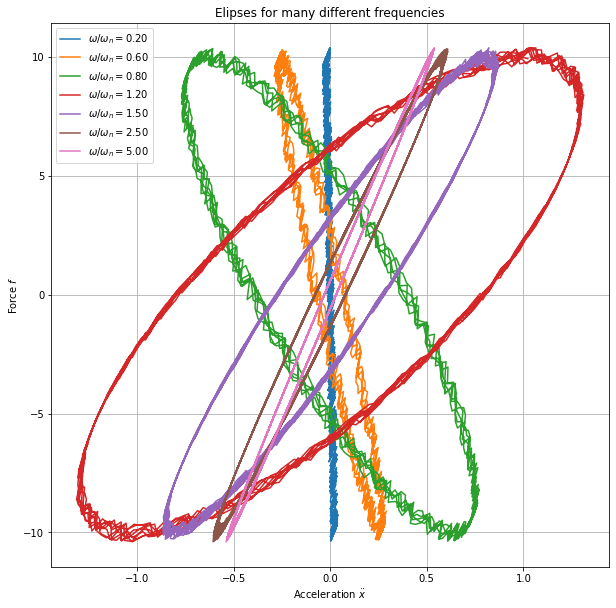

In [13]:
plt.figure(figsize=(10, 10))
for r in rdots:
    t, ddx, f = curves[r]
    plt.plot(ddx, f, label=r"$\omega/\omega_n=%.2f$" %r)
plt.title(r"Elipses for many different frequencies")
plt.ylabel(r"Force $f$")
plt.xlabel(r"Acceleration $\ddot{x}$")
plt.legend()
plt.grid()

## Fitting the values

Our objective now is to find the parameters using only the noisy data. We still use the original/exact informations only to plot and compare with our estimated curve.

To do it, we will follow the steps:

* The elipse can be described by the relation

    $$
    ax^2 + bxy + cy^2 + dx + ey + f = 0
    $$

    With $4ac -b^2 = 1$

    Then we will find the best values of ($a$, $b$, $c$, $d$, $e$, $f$) to fit each curve by the graph above

* With the elipses parameters, we can find the gain $g$ and the phase $\varphi$ and then, for each curve we will get a point 

    $$
    (g_i, \varphi_i) \approx \dfrac{1}{m} \cdot H(\omega_i)
    $$

* Then we will use least squares to find the best values of $m$, $c$ and $k$ using the set of gains $g_i$ and the phase $\varphi_i$

#### Fitting the elipses
From some curves on the image above we will find the curves above 

In [14]:
def fit_ellipse(x: Iterable[float], y: Iterable[float]):
    """
    Fit the coefficients a,b,c,d,e,f, representing an ellipse described by
    the formula F(x,y) = ax^2 + bxy + cy^2 + dx + ey + f = 0 to the provided
    arrays of data points x=[x1, x2, ..., xn] and y=[y1, y2, ..., yn].

    Based on the algorithm of Halir and Flusser, "Numerically stable direct
    least squares fitting of ellipses'.
    """
    D1 = np.vstack([x**2, x*y, y**2]).T
    D2 = np.vstack([x, y, np.ones(len(x))]).T
    S1 = D1.T @ D1
    S2 = D1.T @ D2
    S3 = D2.T @ D2
    T = -np.linalg.inv(S3) @ S2.T
    M = S1 + S2 @ T
    C = np.array(((0, 0, 2), (0, -1, 0), (2, 0, 0)), dtype=float)
    M = np.linalg.inv(C) @ M
    eigval, eigvec = np.linalg.eig(M)
    con = 4 * eigvec[0]* eigvec[2] - eigvec[1]**2
    ak = eigvec[:, np.nonzero(con > 0)[0]]
    coefs = np.concatenate((ak, T @ ak)).ravel()
    coefs /= np.sqrt(4*coefs[0]*coefs[2]-coefs[1]**2)
    return coefs


In [15]:
def get_point_ymax(coefs: Tuple[float]):
    a, b, c, d, e, f = coefs
    if not abs(4*a*c - b**2-1) < 1e-6:
        raise ValueError("4*a*c-b^2=%.6f != 1" % (4*a*c-b**2))
    ymed = b*d-2*a*e
    delta = ymed**2 - 4*a*f + d**2
    ymax = ymed + np.sqrt(delta)
    xref = -(d+b*ymax)/(2*a)
    return (xref, ymax)

def get_point_xmax(coefs: Tuple[float]):
    a, b, c, d, e, f = coefs
    if not abs(4*a*c - b**2-1) < 1e-6:
        raise ValueError("4*a*c-b^2=%.6f != 1" % (4*a*c-b**2))
    xmed = b*e-2*c*d
    delta = xmed**2 - 4*c*f + e**2
    xmax = xmed + np.sqrt(delta)
    yref = -(e+b*xmax)/(2*c)
    return (xmax, yref)

def get_point_ymin(coefs: Tuple[float]):
    a, b, c, d, e, f = coefs
    if not abs(4*a*c - b**2-1) < 1e-6:
        raise ValueError("4*a*c-b^2=%.6f != 1" % (4*a*c-b**2))
    ymed = b*d-2*a*e
    delta = ymed**2 - 4*a*f + d**2
    ymin = ymed - np.sqrt(delta)
    xref = -(d+b*ymin)/(2*a)
    return (xref, ymin)

def get_point_xmin(coefs: Tuple[float]):
    a, b, c, d, e, f = coefs
    if not abs(4*a*c - b**2-1) < 1e-6:
        raise ValueError("4*a*c-b^2=%.6f != 1" % (4*a*c-b**2))
    xmed = b*e-2*c*d
    delta = xmed**2 - 4*c*f + e**2
    xmin = xmed - np.sqrt(delta)
    yref = -(e+b*xmin)/(2*c)
    return (xmin, yref)
    
    

#### Get the approx gain and the phase

In [16]:
points_ymax = np.zeros((len(curves), 2))
points_xmax = np.zeros((len(curves), 2))
points_ymin = np.zeros((len(curves), 2))
points_xmin = np.zeros((len(curves), 2))
for i, (r, (t, ddx, f)) in enumerate(curves.items()):
    coefs = fit_ellipse(ddx, f)
    points_xmax[i] = get_point_xmax(coefs)
    points_ymax[i] = get_point_ymax(coefs)
    points_xmin[i] = get_point_xmin(coefs)
    points_ymin[i] = get_point_ymin(coefs)
    
fmed = (points_ymax[:, 1]+points_ymin[:, 1])/2  # Mean force
famp = (points_ymax[:, 1]-points_ymin[:, 1])/2  # Amplitude force
amed = (points_xmax[:, 0]+points_xmin[:, 0])/2  # Mean acceleration
aamp = (points_xmax[:, 0]-points_xmin[:, 0])/2  # Amplitude acceleration
gainsupo = aamp/famp  # Supposed gain
xref = points_ymax[:, 0]
phisupo = np.arccos((xref-amed)/aamp)  # Supposed phase

Then we can plot the estimated values of gain and phase from the elipses

Text(0.5, 0, 'Frequence relative $r$')

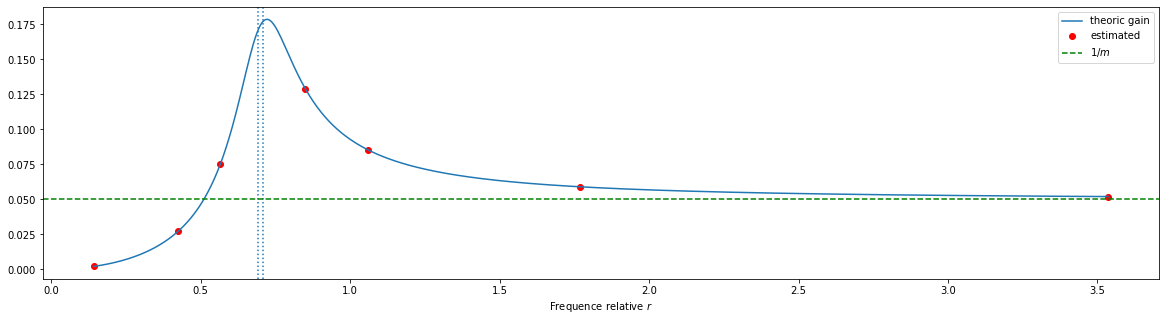

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(wplot, np.abs(Hplot)/m, label="theoric gain")
plt.scatter(wdots, gainsupo, color="r", marker="o", label=r"estimated")
plt.axvline(x=wres, ls="dotted")
plt.axvline(x=wn, ls="dotted")
plt.axhline(y=1/m, ls="dashed", color="g", label=r"$1/m$")
plt.legend()
plt.xlabel(r"Frequence relative $r$")

Text(0.5, 0, 'Frequence relative $r$')

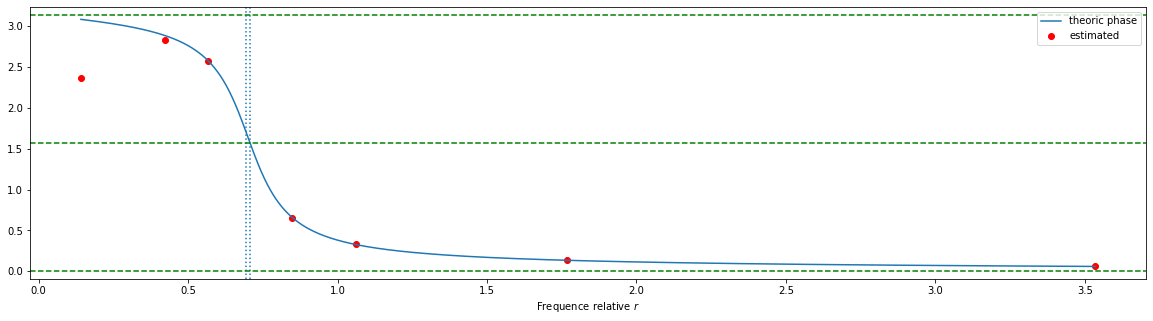

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(wplot, np.angle(Hplot), label="theoric phase")
plt.scatter(wdots, phisupo, color="r", marker="o", label=r"estimated")
plt.axvline(x=wres, ls="dotted")
plt.axvline(x=wn, ls="dotted")
plt.axhline(y=np.pi, ls="dashed", color="g")
plt.axhline(y=np.pi/2, ls="dashed", color="g")
plt.axhline(y=0, ls="dashed", color="g")
plt.legend()
plt.xlabel(r"Frequence relative $r$")

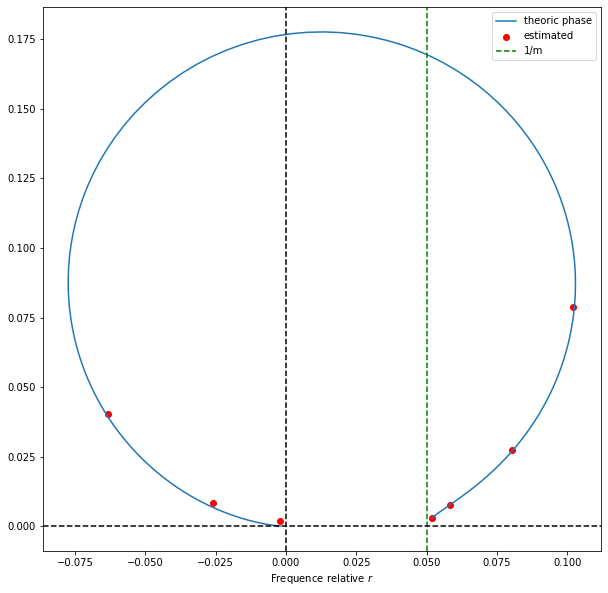

In [19]:
plt.figure(figsize=(10, 10))
plt.plot(np.real(Hplot)/m, np.imag(Hplot)/m, label="theoric phase")
plt.scatter(gainsupo*np.cos(phisupo), gainsupo*np.sin(phisupo), color="r", marker="o", label=r"estimated")
plt.axvline(x=0, ls="dashed", color="k")
plt.axvline(x=1/m, ls="dashed", color="g", label="1/m")
plt.axhline(y=0, ls="dashed", color="k")
plt.xlabel(r"Frequence relative $r$")
plt.legend()

#### Fitting the curve

For this we knonw that

$$
\dfrac{\ddot{x}}{f} = \dfrac{1}{m} \cdot \dfrac{-\left(\dfrac{\omega}{\omega_n}\right)^2}{1-\left(\dfrac{\omega}{\omega_n}\right)^2 + 2i\xi \cdot \dfrac{\omega}{\omega_n}} = \dfrac{\omega^2}{k-m\omega^2 + ic\omega}
$$

As we know the values of the gain $g_i$ and phase $\varphi_i$, we define $x_i$ and $

$$
x_i = g_i \cdot \cos \varphi_i \approx \Re \left(\dfrac{1}{m}H(\omega_i)\right)
$$
$$
y_i = g_i \cdot \sin \varphi_i \approx \Im \left(\dfrac{1}{m}H(\omega_i)\right)
$$

$$
z_i = x_i + i \cdot y_i \approx \dfrac{1}{m} \cdot H(\omega_i) = \dfrac{-\omega_i^2}{k-m\omega_i^2+ic\omega_i}
$$

Another way to write it is

$$
z_i \left(k-m\omega_i^2+ic\omega_i\right) + \omega_i^2 \approx 0
$$

Then we want to minimize the function

$$
J(m, c, k) = \sum_{i} \left|z_i \left(k-m\omega_i^2+ic\omega_i\right) + \omega_i^2\right|^2
$$

Making the least squares we get

$$
\sum_i
\begin{bmatrix}
\omega_i^4 g_i^2 & 0 & -\omega_i^2 g_i^2 \\
0 & \omega_i^2 g_i^2 & 0 \\
-\omega_i^2 g_i^2 & 0 & g_i^2
\end{bmatrix}
\begin{bmatrix}
m \\ c \\ k
\end{bmatrix}
=
\sum_i 
\begin{bmatrix}
x_i \omega_i^4 \\
y_i \omega_i^3 \\
-x_i \omega_i^2
\end{bmatrix}
$$

As it's linear, it's easy to solve.


In [20]:
def fit_curve(wvals: Iterable[float], gain: Iterable[float], phase: Iterable[float]):
    """
    Finds the best value for (m), (c), (k) using the (wvals), (gain) and (phase)
    """
    wvals = np.array(wvals)
    gain = np.array(gain)
    x = gain*np.cos(phase)
    y = gain*np.sin(phase)
    
    g2 = gain**2
    ws2 = wvals**2
    ws3 = ws2*wvals
    ws4 = ws2**2
    sumg2 = np.sum(g2)
    sumw2g2 = np.sum(ws2*g2)
    sumw4g2 = np.sum(ws4*g2)
    sumxw2 = np.sum(x*ws2)
    sumxw4 = np.sum(x*ws4)

    c = np.sum(y*ws3)/sumw2g2
    M = [[sumw4g2, -sumw2g2],
         [-sumw2g2, sumg2]]
    B = [sumxw4, -sumxw2]
    m, k = np.linalg.solve(M, B)
    return m, c, k


In [21]:
msupo, csupo, ksupo = fit_curve(wdots, gainsupo, phisupo)
wnsupo = np.sqrt(ksupo/msupo)
xisupo = csupo/(2*np.sqrt(ksupo*msupo))
rsupo = wplot/wnsupo
Hsupo = -rsupo**2 / (1-rsupo**2 +2j*xisupo*rsupo)
print("Correct values:")
print("    m = %.6f" % m)
print("    c = %.6f" % c)
print("    k = %.6f" % k)
print("Fitting values:")
print("    m = %.6f" % msupo)
print("    c = %.6f" % csupo)
print("    k = %.6f" % ksupo)


Correct values:
    m = 20.000000
    c = 4.000000
    k = 10.000000
Fitting values:
    m = 20.002108
    c = 4.004857
    k = 9.982631


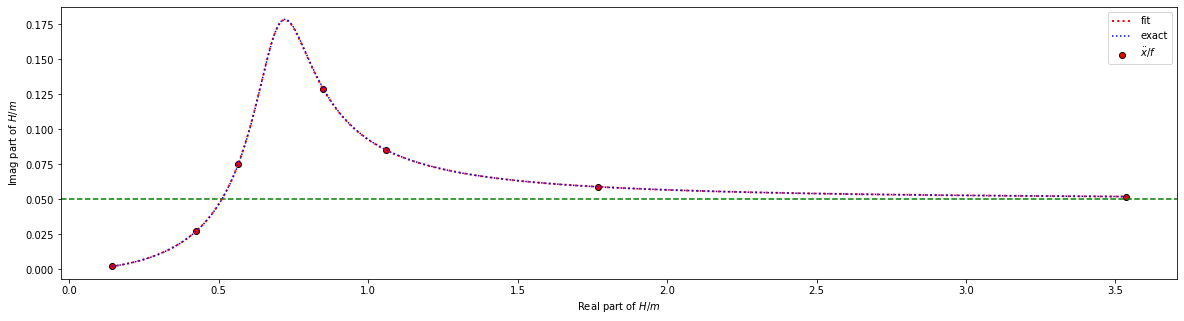

In [22]:
plt.figure(figsize=(20, 5))
plt.axhline(y=1/m, ls="dashed", color="g")
plt.plot(wplot, np.abs(Hsupo)/m, color="r", ls="dotted", lw=2, label="fit")
plt.plot(wplot, np.abs(Hplot)/m, color="b", ls="dotted", label="exact")
plt.scatter(wdots, gainsupo, color="r", marker="o", edgecolors="k", label=r"$\ddot{x}/f$")
plt.xlabel(r"Real part of $H/m$")
plt.ylabel(r"Imag part of $H/m$")
plt.legend()

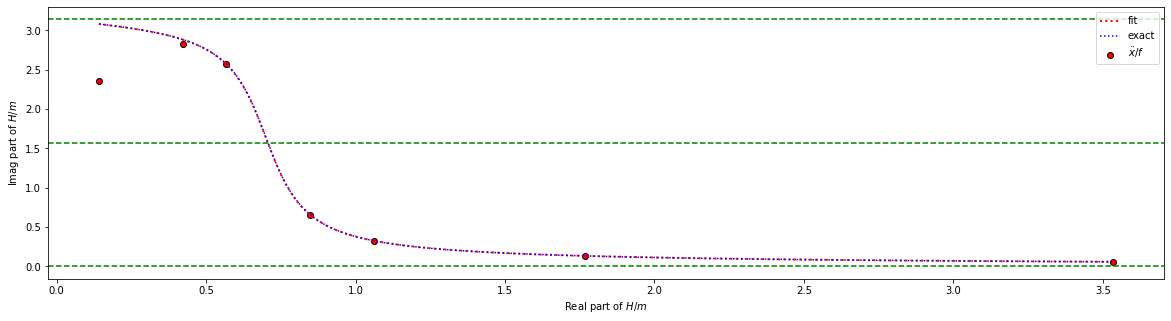

In [23]:
plt.figure(figsize=(20, 5))
plt.axhline(y=0, ls="dashed", color="g")
plt.axhline(y=np.pi/2, ls="dashed", color="g")
plt.axhline(y=np.pi, ls="dashed", color="g")
plt.plot(wplot, np.angle(Hsupo), color="r", ls="dotted", lw=2, label="fit")
plt.plot(wplot, np.angle(Hplot), color="b", ls="dotted", label="exact")
plt.scatter(wdots, phisupo, color="r", marker="o", edgecolors="k", label=r"$\ddot{x}/f$")
plt.xlabel(r"Real part of $H/m$")
plt.ylabel(r"Imag part of $H/m$")
plt.legend()

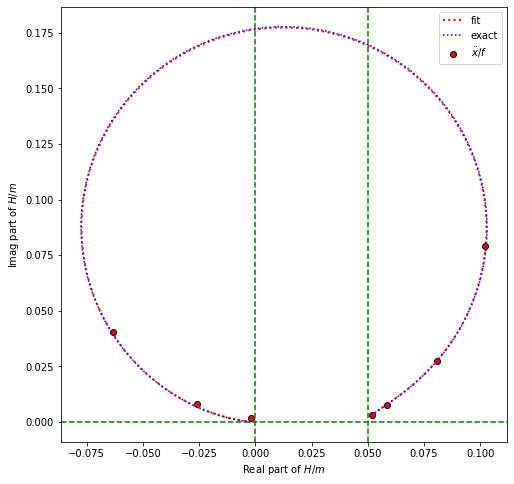

In [24]:
plt.figure(figsize=(8, 8))
plt.axhline(y=0, ls="dashed", color="g")
plt.axvline(x=0, ls="dashed", color="g")
plt.axvline(x=1/m, ls="dashed", color="g")
plt.plot(np.real(Hsupo)/m, np.imag(Hsupo)/m, color="r", ls="dotted", lw=2, label="fit")
plt.plot(np.real(Hplot)/m, np.imag(Hplot)/m, color="b", ls="dotted", label="exact")
plt.scatter(gainsupo*np.cos(phisupo), gainsupo*np.sin(phisupo), color="r", marker="o", edgecolors="k", label=r"$\ddot{x}/f$")
plt.xlabel(r"Real part of $H/m$")
plt.ylabel(r"Imag part of $H/m$")
plt.legend()

## Online Available

This python notebook is available in GitHub at the link:

* [GitHub/carlos-adir/UnB-Courses/vibracoes/estimate-harmonic-force](https://github.com/carlos-adir/UnB-Courses/blob/main/vibracoes/estimate-harmonic-force.ipynb)